In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/original-instant-gratification/sample_submission.csv
/kaggle/input/original-instant-gratification/train.csv
/kaggle/input/original-instant-gratification/public_test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import gc

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train = pd.read_csv('/kaggle/input/original-instant-gratification/train.csv', engine="pyarrow")
test = pd.read_csv('/kaggle/input/original-instant-gratification/public_test.csv', engine="pyarrow")
submission = pd.read_csv('/kaggle/input/original-instant-gratification/sample_submission.csv')

In [4]:
train.shape

(262144, 258)

In [5]:
test.shape

(262144, 257)

In [6]:
print(train['id'].nunique())

262144


In [7]:
test['id'].nunique()

262144

In [8]:
set(train['id'].unique()).intersection(set(test['id'].unique()))

set()

<Axes: >

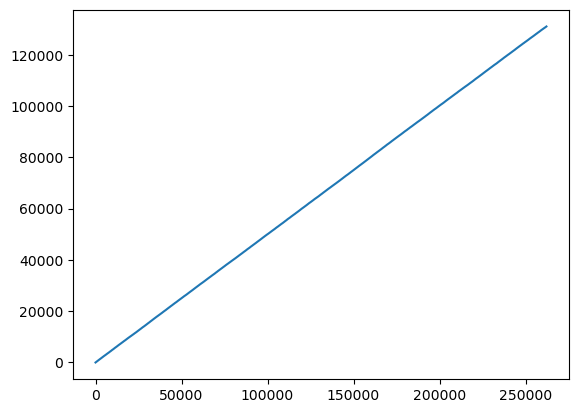

In [9]:
train['target'].cumsum().plot()

0    131079
1    131065
Name: target, dtype: int64


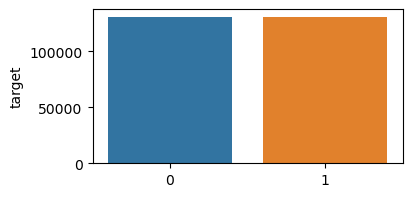

In [10]:
print(train['target'].value_counts())
plt.figure(figsize=(4,2))
sns.barplot(x=train['target'].value_counts().index, y=train['target'].value_counts());

In [11]:
train.isnull().sum().sum()

0

In [12]:
null_value_df = train.isnull().sum().rename_axis('column').reset_index(name='null_count')
null_value_df['ratio'] = null_value_df['null_count']/train.shape[0]*100
null_value_df

,column,null_count,ratio
0,hasty-gold-flamingo-novice,0,0.0
1,smelly-chocolate-dogfish-fimbus,0,0.0
2,woolly-flax-moth-unsorted,0,0.0
3,homey-emerald-beagle-grandmaster,0,0.0
4,crabby-ochre-iguana-golden,0,0.0
...,...,...,...
253,blurry-chocolate-ostrich-pembus,0,0.0
254,silly-indigo-jackal-distraction,0,0.0
255,squirrely-amber-rabbit-golden,0,0.0
256,target,0,0.0


In [13]:
train.dtypes.value_counts()

float64    255
int64        2
object       1
dtype: int64

In [14]:
train.select_dtypes(include=['category','object','int64']).head()

,wheezy-copper-turtle-magic,target,id
0,158,0,10a93253fe00464ea15eab10de90586e
1,358,0,a957370a7ace4aba88ac0deab67b428c
2,290,0,a304905e2f2e4436a63f76fc819366cc
3,471,1,1403d81e619042d99a23d02655a4de3d
4,127,1,dfcd941dbeec47ec819bb643f358b651


In [15]:
train_columns = [c for c in train.columns if c not in ['id','target']]
train[train_columns].nunique(axis=1)

0         256
1         256
2         256
3         256
4         256
         ... 
262139    256
262140    256
262141    256
262142    256
262143    256
Length: 262144, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


165

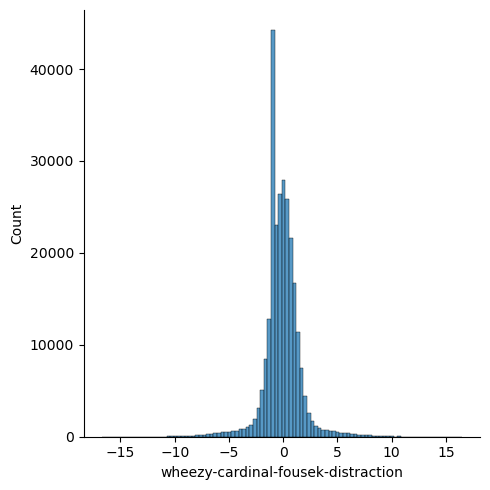

In [16]:
train_null = train.copy()
train_null.loc[np.random.random_sample(train_null.shape[0])<0.1,'wheezy-cardinal-fousek-distraction'] = np.nan
train_null.loc[train_null['wheezy-cardinal-fousek-distraction'].isnull(),'wheezy-cardinal-fousek-distraction'] = -1
sns.displot(train_null['wheezy-cardinal-fousek-distraction'],bins=100, kde=False)
del train_null
gc.collect()

In [17]:
train_columns = [c for c in train.columns if c not in ['id','target']]
train[train_columns].nunique()

hasty-gold-flamingo-novice           262144
smelly-chocolate-dogfish-fimbus      262144
woolly-flax-moth-unsorted            262144
homey-emerald-beagle-grandmaster     262144
crabby-ochre-iguana-golden           262144
                                      ...  
geeky-amaranth-wolfhound-unsorted    262144
randy-red-molly-learn                262144
blurry-chocolate-ostrich-pembus      262144
silly-indigo-jackal-distraction      262144
squirrely-amber-rabbit-golden        262144
Length: 256, dtype: int64

In [18]:
print(np.where(train[train_columns].nunique()<250000))
print(train_columns[146])
train['wheezy-copper-turtle-magic'].nunique()

(array([182]),)
stuffy-magnolia-emu-unsorted


512

512.0


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


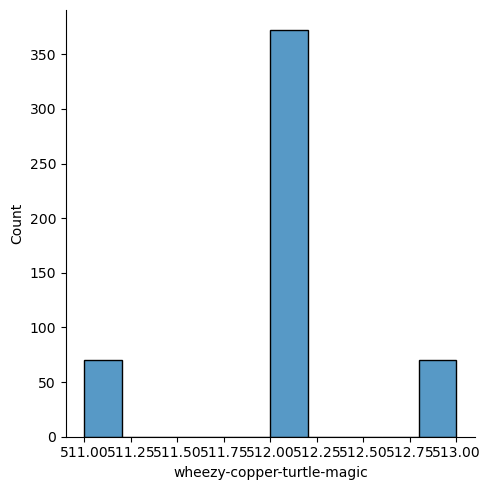

,wheezy-copper-turtle-magic,counts
0,14,513
1,459,513
2,292,513
3,296,513
4,355,513
...,...,...
507,395,511
508,182,511
509,366,511
510,419,511


In [19]:
print(train['wheezy-copper-turtle-magic'].value_counts().mean())
sns.displot(train['wheezy-copper-turtle-magic'].value_counts())
plt.show()
train['wheezy-copper-turtle-magic'].value_counts().rename_axis('wheezy-copper-turtle-magic').reset_index(name='counts')

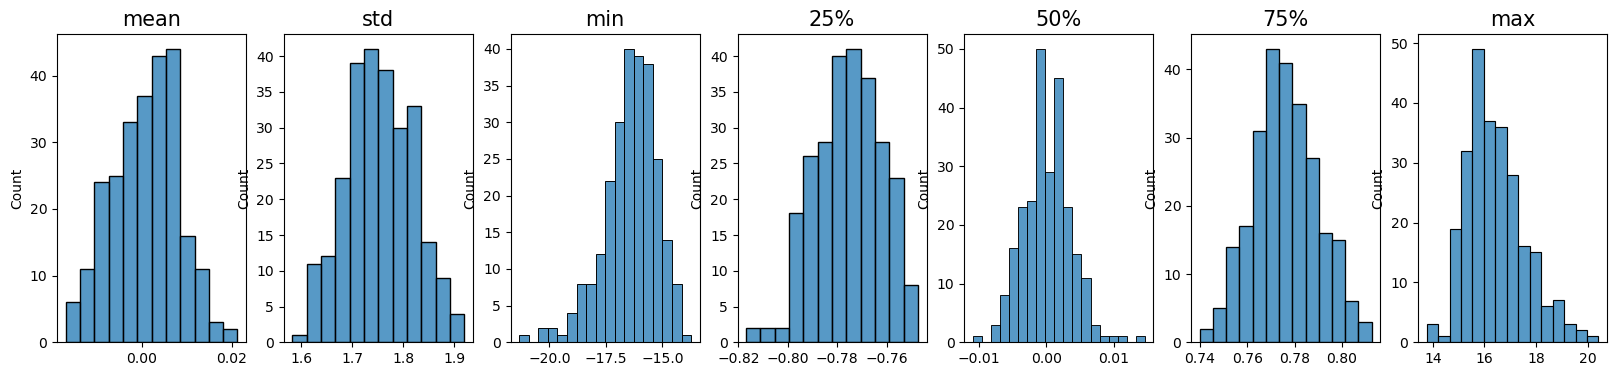

/tmp/ipykernel_32/1218757470.py:13: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  describe_train.T.style.background_gradient(cmap, axis=1).set_precision(2)


In [20]:
train_columns = [c for c in train.columns if c not in ['id','target','wheezy-copper-turtle-magic']]
describe_train = train[train_columns].describe().T.drop('count', axis=1)
f, a = plt.subplots(1, 7, figsize=(20, 4))
for i, name in enumerate(describe_train.columns):
    ax = a[i]
    sns.histplot(describe_train[name], ax=ax)
    ax.set_title(name, fontsize=15)
    ax.set_xlabel('')
# plt.tight_layout()
plt.show()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
describe_train.T.style.background_gradient(cmap, axis=1).set_precision(2)

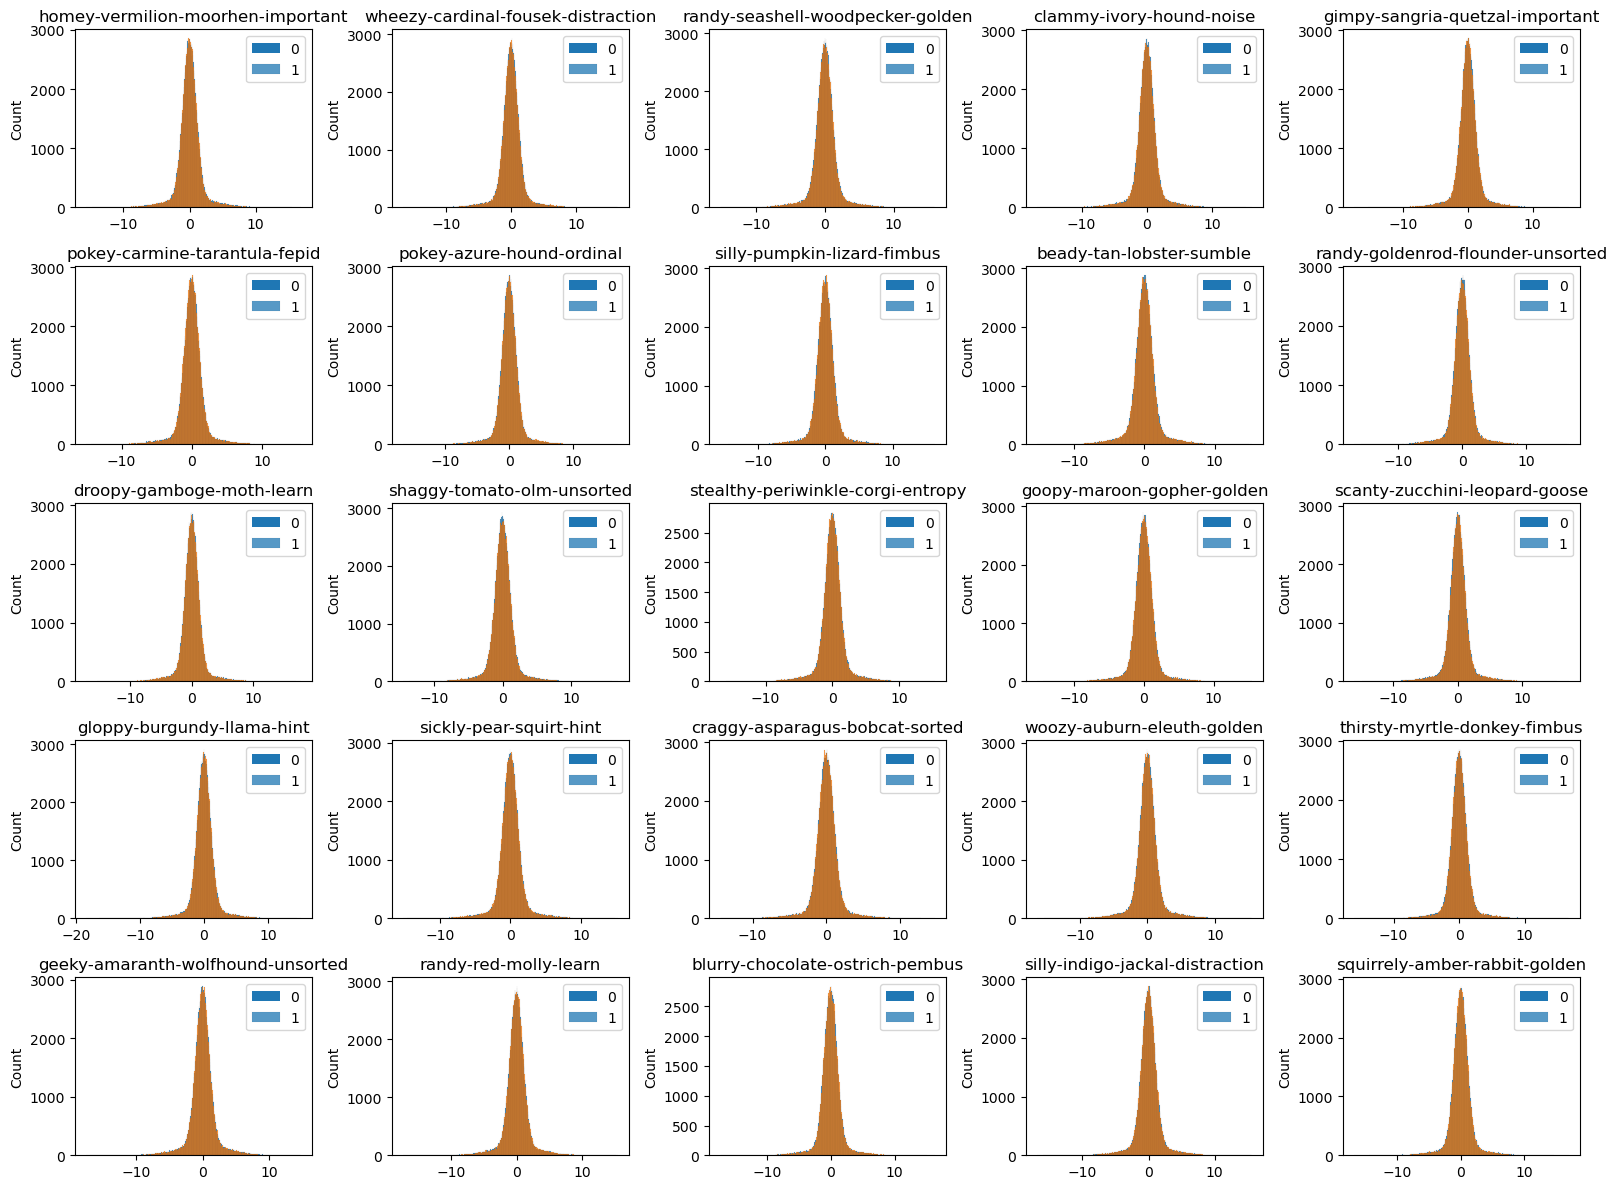

In [21]:
train_columns = [c for c in train.columns if c not in ['id','target']]
target_0_df = train.loc[train['target']==0]
target_1_df = train.loc[train['target']==1]
plt.figure(figsize=(16,12))
for i, name in enumerate(train_columns[-25:]):
    plt.subplot(5,5,i+1)
    sns.histplot(target_0_df[name])
    sns.histplot(target_1_df[name])
    plt.title(name)
    plt.xlabel('')
    plt.legend(['0','1'])
    
plt.tight_layout()
plt.show()